# Chart Generation

# Distribution of Video Length

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to calculate video durations
def calculate_video_lengths(video_paths):
    video_lengths = []
    for video_path in video_paths:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Could not open video: {video_path}")
            continue
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        if fps > 0:
            duration = frame_count / fps
            video_lengths.append(duration)
        else:
            print(f"Invalid FPS for video: {video_path}")
        cap.release()
    return video_lengths

# Function to plot video length distributions
def plot_video_length_distributions(original_lengths, tampered_lengths, output_path="video_length_comparison.png"):
    plt.figure(figsize=(12, 6))

    # Original video lengths
    plt.subplot(1, 2, 1)
    plt.hist(original_lengths, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Video Length (seconds)')
    plt.ylabel('Number of Videos')
    plt.grid(True)

    # Tampered video lengths
    plt.subplot(1, 2, 2)
    plt.hist(tampered_lengths, bins=20, color='lightcoral', edgecolor='black')
    plt.title('Tampered Video Length Distribution')
    plt.xlabel('Video Length (seconds)')
    plt.ylabel('Number of Videos')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    print(f"Graph saved to {output_path}")

# Function to get all video files in a directory (including subdirectories)
def get_all_video_files(directory, extension=".mp4"):
    video_files = []
    for root, _, files in os.walk(directory):
        video_files.extend([os.path.join(root, f) for f in files if f.endswith(extension)])
    return video_files

# Set paths to dataset directories
original_dataset_path = "/content/drive/MyDrive/SanityVideos/OriginalVideos"
tampered_dataset_path = "/content/drive/MyDrive/SanityVideos/OriginalVideos/TamperedVideos"

# Detect video files

original_video_files = [os.path.join(original_dataset_path, f) for f in os.listdir(original_dataset_path) if f.endswith(".mp4")]

tampered_video_files = get_all_video_files(tampered_dataset_path)

# Debugging: print file counts
print(f"Original videos found: {len(original_video_files)}")
print(f"Tampered videos found: {len(tampered_video_files)}")

# Calculate video lengths
original_video_lengths = calculate_video_lengths(original_video_files)
tampered_video_lengths = calculate_video_lengths(tampered_video_files)

# Plot distributions
plot_video_length_distributions(original_video_lengths, tampered_video_lengths, output_path="video_length_comparison.png")


# Data Loading

In [26]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel("./assets/inference_results.xlsx")
# df.rename(columns={"Unnamed: 0": "Effect"}, inplace=True)
# df.set_index("Effect", inplace=True)
# df = data
df

,Unnamed: 0,Aria,InternVL2-1B,InternVL2-2B,InternVL2-4B,InternVL2-8B,Llama-3-VILA1.5-8b,Llama-3.2-11B-Vision-Instruct,NVLM,Phi-3-Vision,...,VILA1.5-13b,VILA1.5-3b,VILA1.5-40b,Vintern-3B-beta,llava_onevision_qwen2_0.5b_ov,llava_onevision_qwen2_72b_ov,llava_onevision_qwen2_7b_ov,llava_video_qwen2_7b,molmo-7B-D-0924,molmoE-1B-0924
0,dropping,67.68%,3.89%,99.82%,99.97%,81.11%,0.05%,55.24%,47.50%,0.11%,...,26.39%,38.00%,99.68%,60.26%,0.00%,1.24%,0.87%,0.34%,100.00%,100.00%
1,masking,72.08%,3.66%,99.47%,100.00%,92.68%,0.13%,56.13%,48.29%,0.08%,...,30.24%,56.16%,99.95%,60.11%,0.00%,8.42%,2.84%,0.26%,100.00%,100.00%
2,repetition,68.16%,3.53%,99.84%,99.97%,79.63%,0.03%,56.24%,48.66%,0.00%,...,26.82%,39.24%,99.50%,60.89%,0.00%,1.11%,0.58%,0.29%,100.00%,100.00%
3,rotate,68.50%,3.89%,99.87%,100.00%,88.50%,0.13%,55.58%,48.29%,0.08%,...,27.50%,46.95%,99.92%,60.21%,0.00%,2.03%,1.05%,0.32%,100.00%,100.00%
4,substitution,67.58%,3.87%,99.82%,99.97%,82.08%,0.05%,53.29%,47.45%,0.11%,...,26.76%,39.42%,99.71%,60.24%,0.00%,1.26%,0.87%,0.32%,100.00%,100.00%
5,overall,68.80%,3.77%,99.76%,99.98%,84.80%,0.08%,55.29%,48.04%,0.07%,...,27.54%,43.95%,99.75%,60.34%,0.00%,2.81%,1.24%,0.31%,100.00%,100.00%


# ===== Analysis 1: Overall Performance =====

In [28]:
# Clean the data (remove % and convert to numeric)
df_cleaned = df.copy()
df_cleaned.rename(columns={"Unnamed: 0": "Effect"}, inplace=True)
# Exclude the 'Effect' column during cleaning
numeric_columns = df_cleaned.columns[1:]  # All columns except "Effect"
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].replace('%', '', regex=True).astype(float)
df_cleaned

,Effect,Aria,InternVL2-1B,InternVL2-2B,InternVL2-4B,InternVL2-8B,Llama-3-VILA1.5-8b,Llama-3.2-11B-Vision-Instruct,NVLM,Phi-3-Vision,...,VILA1.5-13b,VILA1.5-3b,VILA1.5-40b,Vintern-3B-beta,llava_onevision_qwen2_0.5b_ov,llava_onevision_qwen2_72b_ov,llava_onevision_qwen2_7b_ov,llava_video_qwen2_7b,molmo-7B-D-0924,molmoE-1B-0924
0,dropping,67.68,3.89,99.82,99.97,81.11,0.05,55.24,47.50,0.11,...,26.39,38.00,99.68,60.26,0.0,1.24,0.87,0.34,100.0,100.0
1,masking,72.08,3.66,99.47,100.00,92.68,0.13,56.13,48.29,0.08,...,30.24,56.16,99.95,60.11,0.0,8.42,2.84,0.26,100.0,100.0
2,repetition,68.16,3.53,99.84,99.97,79.63,0.03,56.24,48.66,0.00,...,26.82,39.24,99.50,60.89,0.0,1.11,0.58,0.29,100.0,100.0
3,rotate,68.50,3.89,99.87,100.00,88.50,0.13,55.58,48.29,0.08,...,27.50,46.95,99.92,60.21,0.0,2.03,1.05,0.32,100.0,100.0
4,substitution,67.58,3.87,99.82,99.97,82.08,0.05,53.29,47.45,0.11,...,26.76,39.42,99.71,60.24,0.0,1.26,0.87,0.32,100.0,100.0
5,overall,68.80,3.77,99.76,99.98,84.80,0.08,55.29,48.04,0.07,...,27.54,43.95,99.75,60.34,0.0,2.81,1.24,0.31,100.0,100.0


In [29]:
# Extract "Overall" row as a series
overall_values = df_cleaned[df_cleaned["Effect"] == "overall"].set_index("Effect").iloc[0]

# Ensure proper numeric conversion of overall values
overall_values = overall_values.astype(float)

# Filter columns based on the condition
filtered_columns = overall_values[(overall_values > 4) & (overall_values < 99)].index.tolist()

# Create a filtered dataframe with the selected columns
filtered_df = df_cleaned[["Effect"] + filtered_columns]
filtered_df
df_cleaned = filtered_df

<Figure size 1200x600 with 0 Axes>

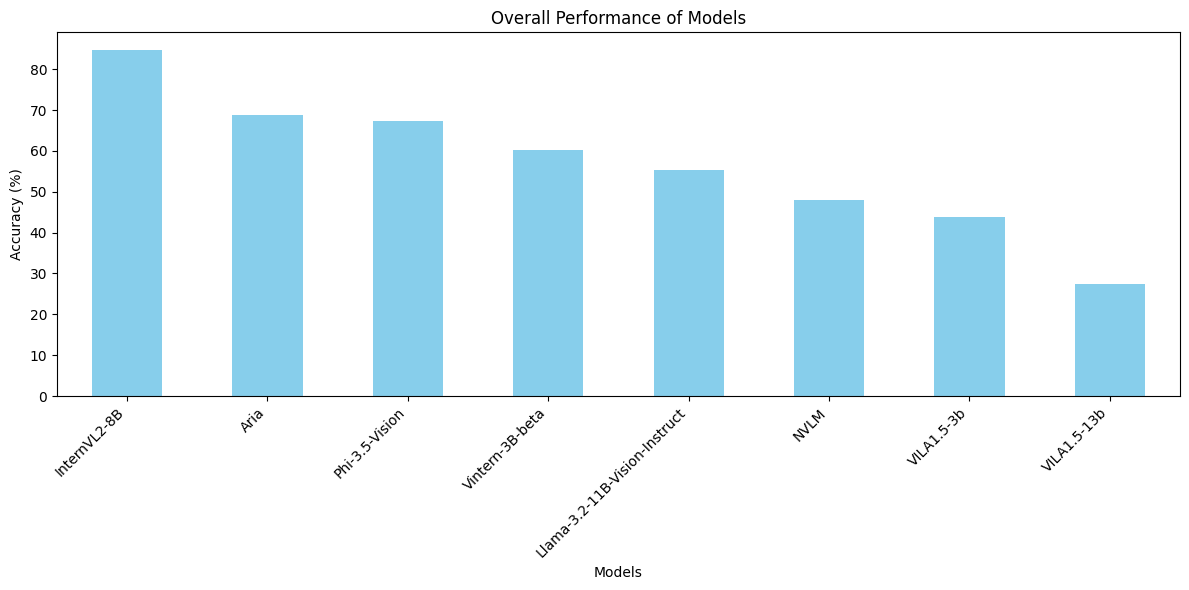

In [30]:
# ===== Analysis 1: Overall Performance =====
# Extract the "Overall" row
overall_performance = df_cleaned[df_cleaned["Effect"] == "overall"].set_index("Effect").T
overall_performance.columns = ["Overall Accuracy"]

# Sort models by overall accuracy
overall_performance = overall_performance.sort_values("Overall Accuracy", ascending=False)

# Plot overall performance
plt.figure(figsize=(12, 6))
overall_performance.plot(kind="bar", figsize=(12, 6), color="skyblue", legend=False)
plt.title("Overall Performance of Models")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("assets/overall_performance.png", dpi=300)
plt.show()
plt.close()


# ===== Analysis 2: Heatmap of Effects =====

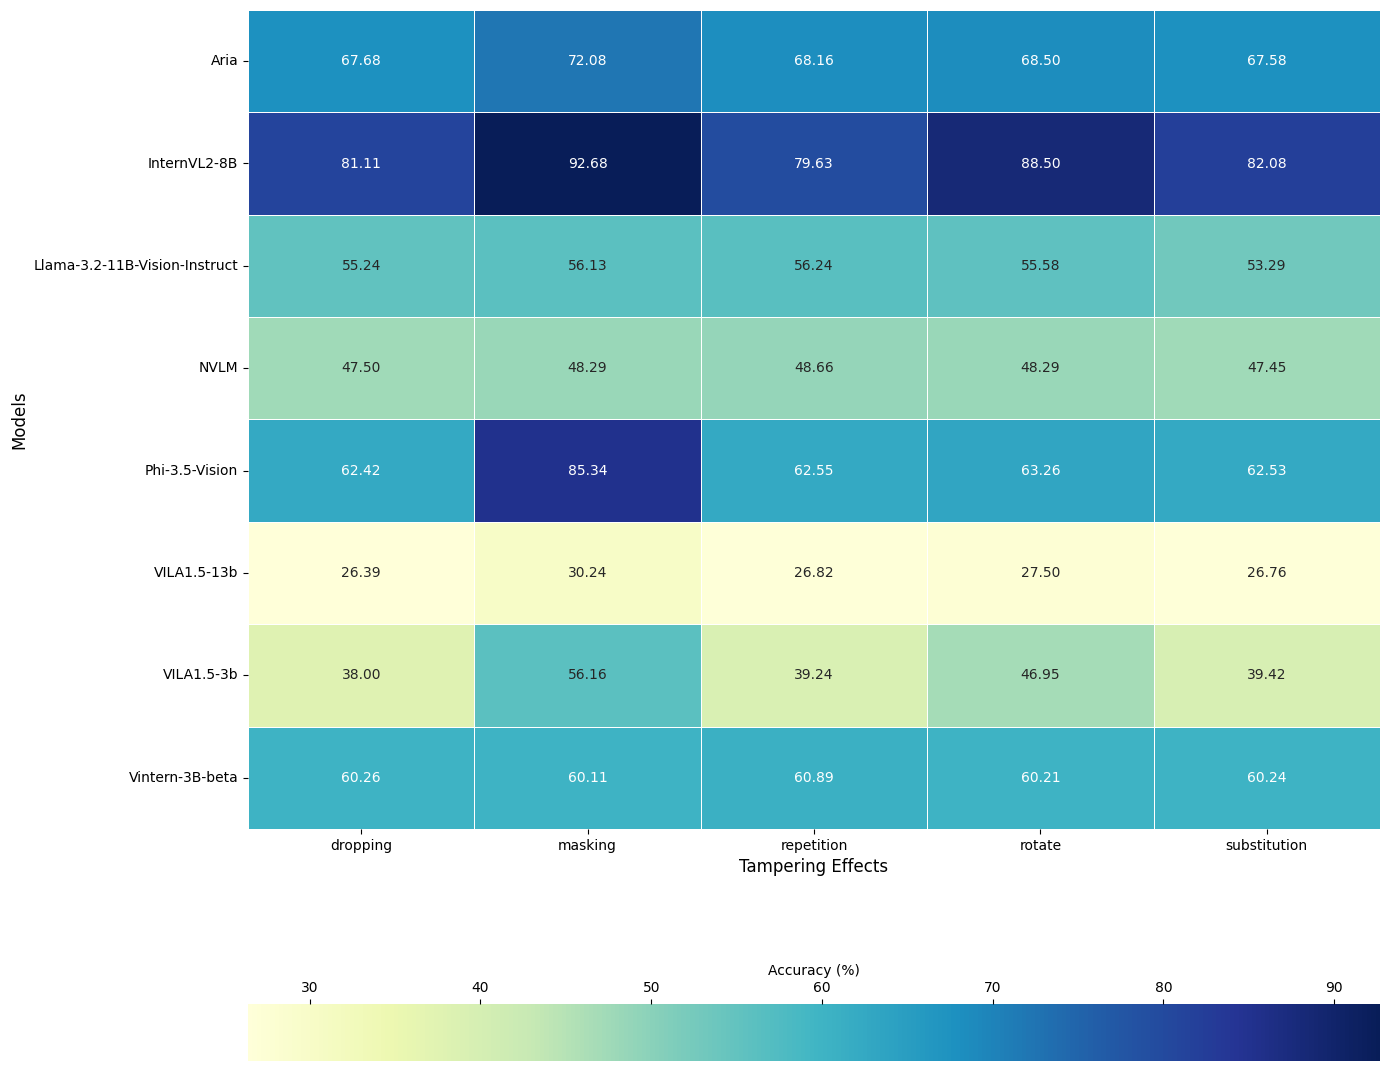

In [31]:
# ===== Analysis 2: Heatmap of Effects =====
# Drop the "Overall" row
df_effects = df_cleaned[df_cleaned["Effect"] != "overall"].set_index("Effect")

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    df_effects.T, 
    annot=True,
    cmap='YlGnBu',
    linewidths=0.5,
    fmt='.2f',
    cbar_kws={'label': 'Accuracy (%)', 'orientation': 'horizontal'}
)
# plt.title("Model Performance Across Tampering Effects")
plt.xlabel("Tampering Effects",fontsize=12)
plt.ylabel("Models",fontsize=12)
# plt.xticks(rotation=45, ha="right")
cbar = plt.gca().collections[0].colorbar
cbar.ax.xaxis.set_ticks_position('top')  # Move ticks to the top
cbar.ax.xaxis.set_label_position('top')  # Move label to the top
plt.tight_layout()
plt.savefig("assets/heatmap_performance.png", dpi=300)
plt.show()
plt.close()

# print(f"Heatmap saved as '{output_file_heatmap}' with high resolution.")

# ===== Analysis 3: Gaps Between "Overall" and Individual Effects =====

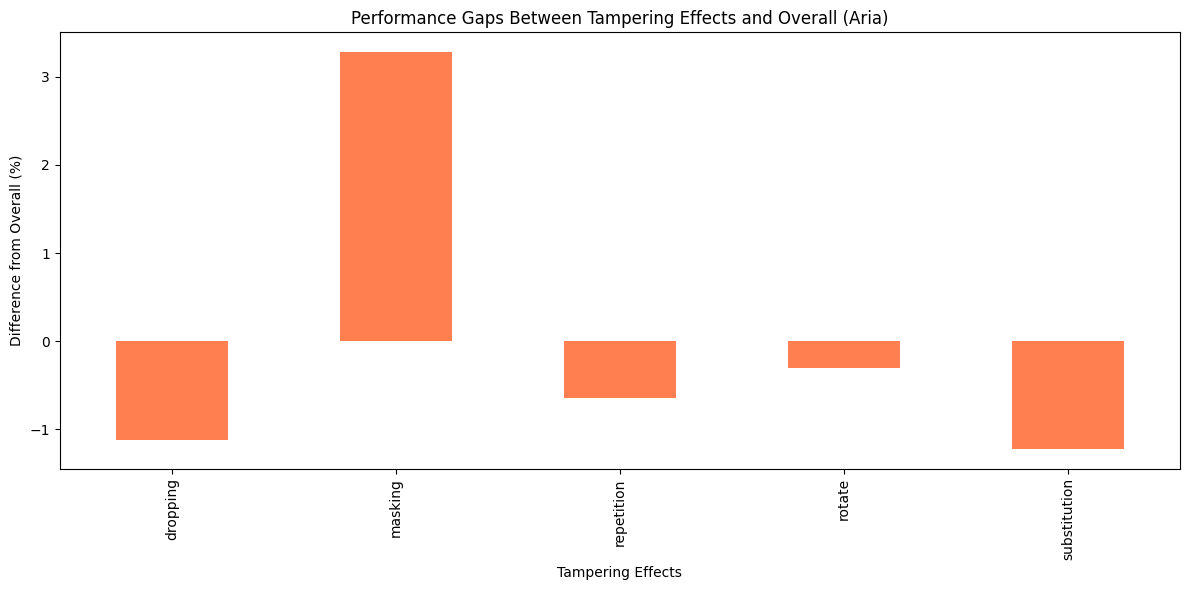

In [32]:

# Ensure 'Effect' is set as the index for df_effects
df_effects = df_cleaned[df_cleaned["Effect"] != "overall"].set_index("Effect")

# Extract "Overall" row, ensuring it's set up for subtraction
df_overall = df_cleaned[df_cleaned["Effect"] == "overall"].set_index("Effect").T
df_overall.columns = ["overall"]

# Calculate the difference between individual effects and overall
gaps = df_effects.T.subtract(df_overall["overall"], axis=0)

# Plot gaps for a specific model (e.g., Aria)
plt.figure(figsize=(12, 6))
gaps.loc["Aria"].plot(kind="bar", color="coral")
plt.title("Performance Gaps Between Tampering Effects and Overall (Aria)")
plt.ylabel("Difference from Overall (%)")
plt.xlabel("Tampering Effects")
plt.tight_layout()
plt.show()
# plt.savefig("/mnt/data/gaps_analysis_aria_fixed.png", dpi=300)
plt.close()


# Model Performance Chart based on Tampering Effects

In [33]:
df_plot = df_cleaned.copy()
df_plot.set_index("Effect", inplace=True)
df_plot

,Aria,InternVL2-8B,Llama-3.2-11B-Vision-Instruct,NVLM,Phi-3.5-Vision,VILA1.5-13b,VILA1.5-3b,Vintern-3B-beta
Effect,,,,,,,,
dropping,67.68,81.11,55.24,47.50,62.42,26.39,38.00,60.26
masking,72.08,92.68,56.13,48.29,85.34,30.24,56.16,60.11
repetition,68.16,79.63,56.24,48.66,62.55,26.82,39.24,60.89
rotate,68.50,88.50,55.58,48.29,63.26,27.50,46.95,60.21
substitution,67.58,82.08,53.29,47.45,62.53,26.76,39.42,60.24
overall,68.80,84.80,55.29,48.04,67.22,27.54,43.95,60.34


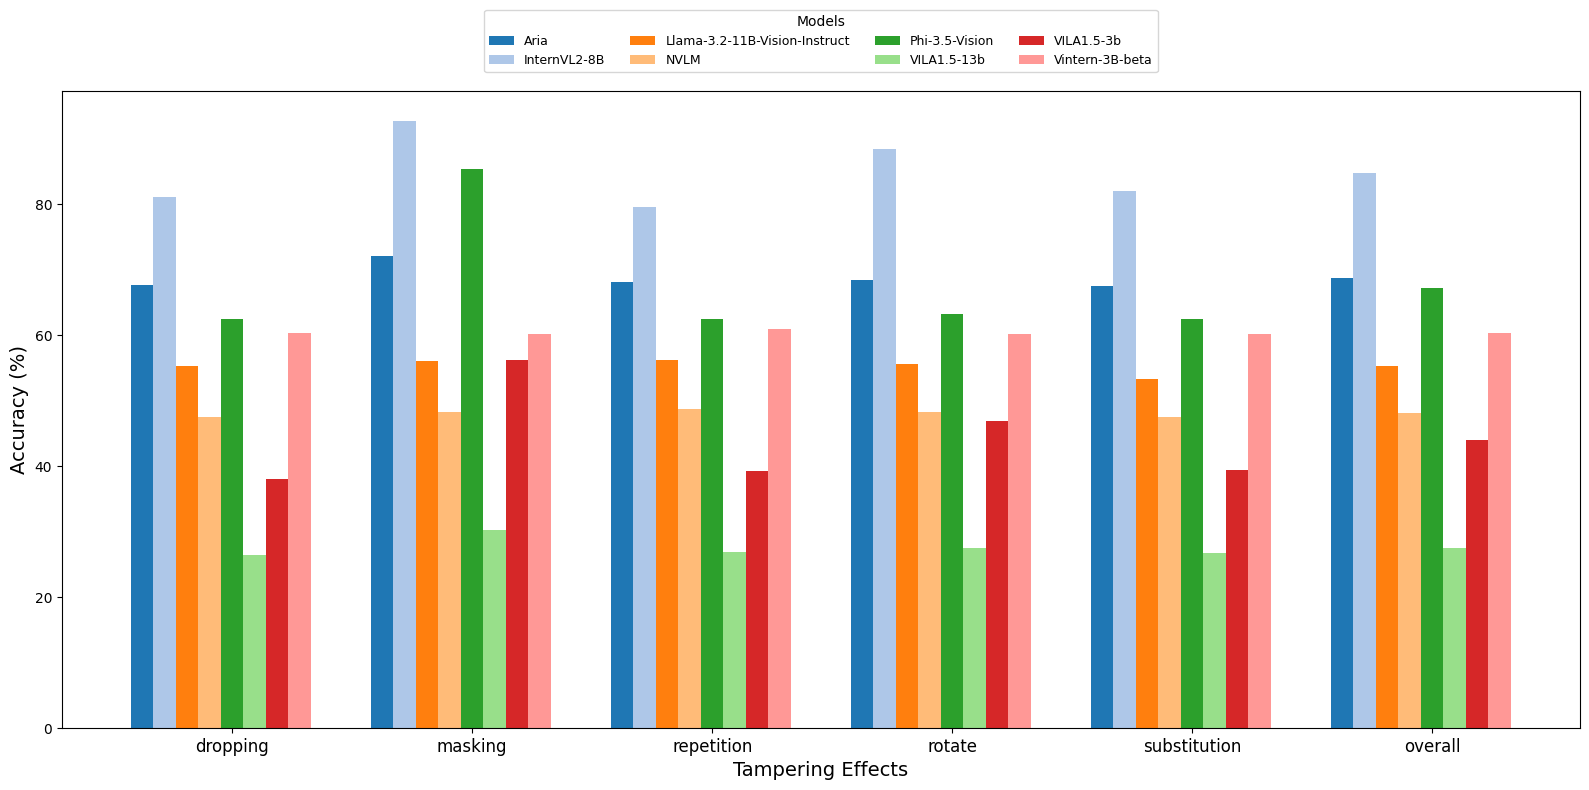

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Plot settings
bar_width = 0.75
index = np.arange(len(df_plot.index))
num_models = len(df_plot.columns)
colors = plt.cm.tab20.colors  # 20 different colors

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Plot directly from DataFrame
for i, model in enumerate(df_plot.columns):
    ax.bar(index + i * bar_width / num_models, df_plot[model], bar_width / num_models, 
           label=model, color=colors[i % len(colors)])

# Add labels and legend
ax.set_xlabel("Tampering Effects", fontsize=14)
ax.set_ylabel("Accuracy (%)", fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_plot.index, rotation=0, fontsize=12)
ax.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', fontsize=9, ncol=4, title="Models")

# Adjust layout
plt.tight_layout()

# Save the figure in high resolution
plt.savefig("model_performance_chart_from_dataframe.png", dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

# Model Performance on RADAR Chart

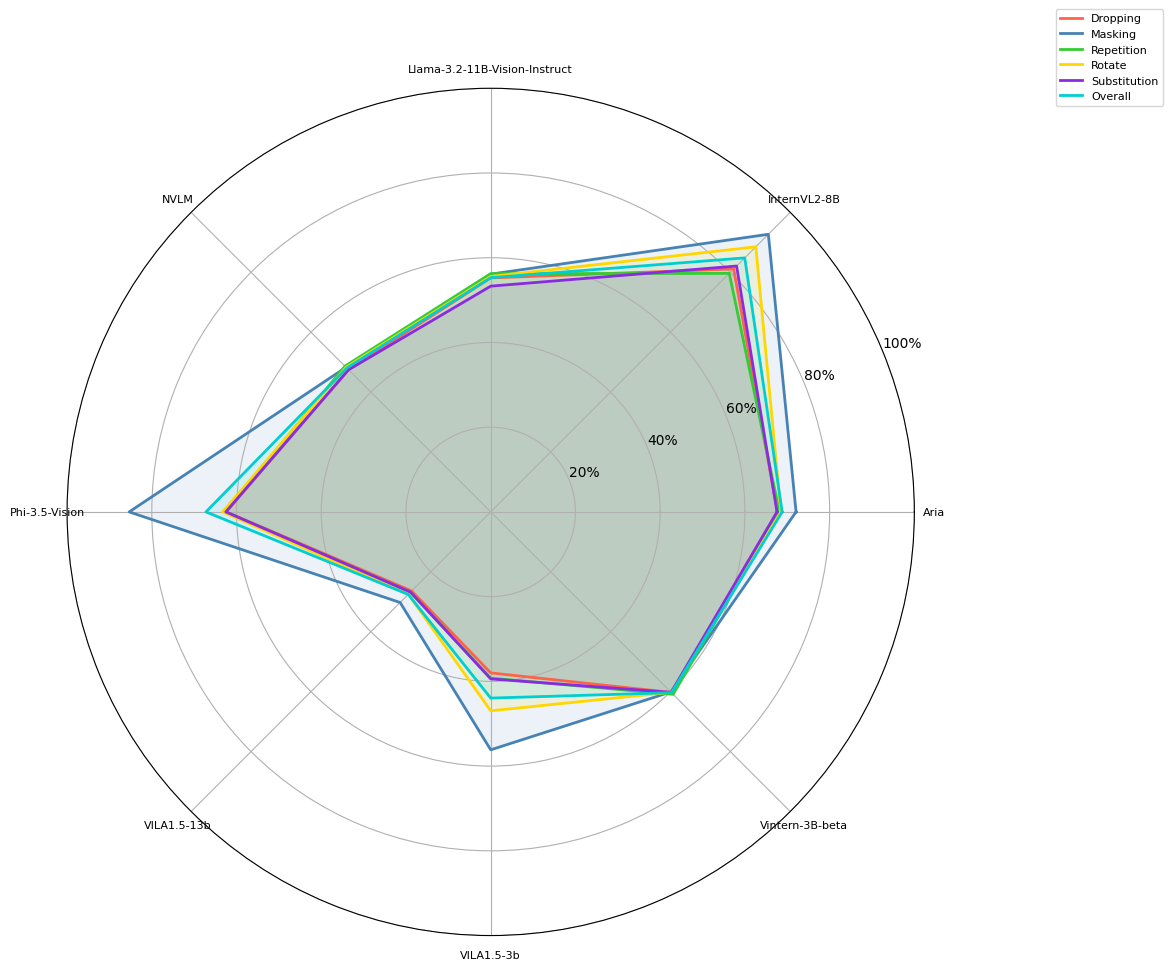

'assets/effects_on_models_radar_chart_from_dataframe.png'

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Clean the data (assuming df_cleaned is already processed)
df_effects = df_cleaned[df_cleaned["Effect"] != "overall"].set_index("Effect")
df_overall = df_cleaned[df_cleaned["Effect"] == "overall"].set_index("Effect").T

# Combine specific effects and overall
effects = df_effects.index.tolist() + ["overall"]
models = df_effects.columns.tolist()

# Prepare the data for plotting
angles = np.linspace(0, 2 * np.pi, len(models), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Colors for each effect
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#00CED1']

# Plot each effect for each model
for i, effect in enumerate(effects):
    if effect == "overall":
        # Use overall accuracy for the last plot
        values = df_overall["overall"].tolist()
    else:
        # Use specific effect values
        values = df_effects.loc[effect].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=effect.capitalize(), linewidth=2, color=colors[i % len(colors)])  # Darker line color
    ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])  # Lighter fill color

# Customize the radar chart
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models, fontsize=8)

# Add a legend
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=8)

# Save the chart as a high-resolution image
output_file = "assets/effects_on_models_radar_chart_from_dataframe.png"
plt.tight_layout()
plt.savefig(output_file, dpi=300)
plt.show()
plt.close()

# Output path for the radar chart
output_file
